In [266]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import shap

### 🔹 Step 1: Load the Test Dataset
- Ensure the dataset contains the same features used during training.

In [267]:
# Load test dataset
test_data_path = "../../artifacts/data/processed/test.csv"  # Adjust path as needed
df_test = pd.read_csv(test_data_path)

# Display sample data
print(df_test.head())

   Volume     Open     High      Low    Close      AHMA  Leavitt_Projection  \
0   83882  1.07566  1.07650  1.07112  1.07298  1.071736            1.066661   
1   88884  1.07298  1.07523  1.06319  1.06440  1.069301            1.066886   
2   75731  1.06440  1.06878  1.06333  1.06592  1.067177            1.066743   
3   56799  1.06592  1.06989  1.06548  1.06919  1.066696            1.066478   
4   60101  1.06919  1.07180  1.06752  1.06791  1.066469            1.066136   

   Leavitt_Convolution  LC_Slope  LC_Intercept  ...  Momentum_T-1  \
0             1.066535  0.000123      1.066167  ...     -0.003068   
1             1.067539  0.000546      1.065900  ...     -0.005505   
2             1.066845  0.000041      1.066722  ...      0.009424   
3             1.066294 -0.000204      1.066906  ...      0.001640   
4             1.065846 -0.000303      1.066756  ...     -0.004265   

   Momentum_T-2  Momentum_T-5  Momentum_T-10  Momentum_T-21  Hour  \
0     -0.007277     -0.003004      -0.006

✅ Now, we have the test dataset loaded with Date as the index.

---

### 🔹 Step 2: Extract the Correct Features
- To ensure model compatibility, extract only the features used during training.

In [268]:
# Extract feature columns (remove target columns)
target_column = "Projected_Direction"  # Adjust if needed
original_features = [col for col in df_test.columns if col != target_column]

# Select matching features in the test set
X_test = df_test[original_features].dropna()

# Display extracted features
print("Extracted Features:\n", X_test.head())

Extracted Features:
    Volume     Open     High      Low    Close      AHMA  Leavitt_Projection  \
0   83882  1.07566  1.07650  1.07112  1.07298  1.071736            1.066661   
1   88884  1.07298  1.07523  1.06319  1.06440  1.069301            1.066886   
2   75731  1.06440  1.06878  1.06333  1.06592  1.067177            1.066743   
3   56799  1.06592  1.06989  1.06548  1.06919  1.066696            1.066478   
4   60101  1.06919  1.07180  1.06752  1.06791  1.066469            1.066136   

   Leavitt_Convolution  LC_Slope  LC_Intercept  ...  Target_T+21  \
0             1.066535  0.000123      1.066167  ...    -0.018779   
1             1.067539  0.000546      1.065900  ...    -0.012683   
2             1.066845  0.000041      1.066722  ...    -0.009372   
3             1.066294 -0.000204      1.066906  ...    -0.010821   
4             1.065846 -0.000303      1.066756  ...    -0.013400   

   Momentum_T-1  Momentum_T-2  Momentum_T-5  Momentum_T-10  Momentum_T-21  \
0     -0.003068   

✅ Ensures test features match training features.

---

### 🔹 Step 3: Handle Missing or Unmatched Columns
- If columns are missing, handle them gracefully:

In [269]:
print(original_features)

['Volume', 'Open', 'High', 'Low', 'Close', 'AHMA', 'Leavitt_Projection', 'Leavitt_Convolution', 'LC_Slope', 'LC_Intercept', 'LC_Acceleration', 'Convolution_Probability', 'Returns', 'Target_T+1', 'Target_T+2', 'Target_T+5', 'Target_T+10', 'Target_T+21', 'Momentum_T-1', 'Momentum_T-2', 'Momentum_T-5', 'Momentum_T-10', 'Momentum_T-21', 'Hour', 'Day_Of_Week', 'Month', 'Year']


In [270]:
# Ensure test set has all required columns
missing_cols = [col for col in original_features if col not in df_test.columns]

if missing_cols:
    print(f"⚠️ Warning: Missing Columns in Test Data: {missing_cols}")

    # Option 1: Fill with Zeros (if reasonable)
    for col in missing_cols:
        df_test[col] = 0

    # Option 2: Drop Columns from Feature List (only if necessary)
    original_features = [col for col in original_features if col in df_test.columns]

# Extract final feature set
X_test = df_test[original_features]
X_test.shape, X_test.columns

((364, 27),
 Index(['Volume', 'Open', 'High', 'Low', 'Close', 'AHMA', 'Leavitt_Projection',
        'Leavitt_Convolution', 'LC_Slope', 'LC_Intercept', 'LC_Acceleration',
        'Convolution_Probability', 'Returns', 'Target_T+1', 'Target_T+2',
        'Target_T+5', 'Target_T+10', 'Target_T+21', 'Momentum_T-1',
        'Momentum_T-2', 'Momentum_T-5', 'Momentum_T-10', 'Momentum_T-21',
        'Hour', 'Day_Of_Week', 'Month', 'Year'],
       dtype='object'))

In [271]:
# Load trained model (XGBoost or CatBoost)
#model_path = "../../artifacts/models/cat_boost_model.pkl"  # Adjust based on best model
model_path = "../../artifacts/models/model.pkl"  # Adjust based on best model
model = joblib.load(model_path)

✅ Handles missing features safely without breaking the model.

---

### 🔹 Step 4: Normalize or Scale If Needed
- If you applied scaling (StandardScaler, MinMaxScaler) during training, apply the same here.

In [272]:
# Load the saved scaler
scaler_path = "../../artifacts/preprocessor.pkl"  # Adjust path
scaler = joblib.load(scaler_path)

print(X_test.describe())

# Transform test data
X_test_scaled = scaler.transform(X_test)

print(type(X_test_scaled))
# Check the shape
print(X_test_scaled.shape)

              Volume        Open        High         Low       Close  \
count     364.000000  364.000000  364.000000  364.000000  364.000000   
mean    98902.310440    1.077004    1.080182    1.073594    1.076900   
std     43781.512779    0.020741    0.020492    0.021172    0.020843   
min     27385.000000    1.024340    1.025010    1.017790    1.024340   
25%     72227.250000    1.063748    1.067155    1.059958    1.062455   
50%     87707.000000    1.080850    1.083850    1.077900    1.080850   
75%    113760.250000    1.089870    1.093125    1.087330    1.089870   
max    398838.000000    1.119280    1.121420    1.115020    1.119280   

             AHMA  Leavitt_Projection  Leavitt_Convolution    LC_Slope  \
count  364.000000          364.000000           364.000000  364.000000   
mean     1.076880            1.076776             1.076689   -0.000087   
std      0.021086            0.022037             0.022569    0.002399   
min      1.025912            1.024600             1.024

In [273]:
# Assuming the preprocessor has a method to get feature names
from sklearn.compose import ColumnTransformer

# Extract feature names (for ColumnTransformer pipelines)
if isinstance(scaler, ColumnTransformer):
    feature_names = scaler.get_feature_names_out()
else:
    feature_names = X_test.columns  # Fallback to original names

# Print new feature names
print(feature_names)

['num_pipeline__Leavitt_Projection' 'num_pipeline__Leavitt_Convolution'
 'num_pipeline__LC_Slope' 'num_pipeline__LC_Acceleration'
 'num_pipeline__Convolution_Probability' 'num_pipeline__Momentum_T-1'
 'num_pipeline__Momentum_T-2' 'num_pipeline__Momentum_T-5'
 'num_pipeline__Momentum_T-10' 'num_pipeline__Momentum_T-21'
 'cat_pipeline__Day_Of_Week_0' 'cat_pipeline__Day_Of_Week_1'
 'cat_pipeline__Day_Of_Week_2' 'cat_pipeline__Day_Of_Week_3'
 'cat_pipeline__Day_Of_Week_4' 'cat_pipeline__Day_Of_Week_6'
 'cat_pipeline__Month_1' 'cat_pipeline__Month_2' 'cat_pipeline__Month_3'
 'cat_pipeline__Month_4' 'cat_pipeline__Month_5' 'cat_pipeline__Month_6'
 'cat_pipeline__Month_7' 'cat_pipeline__Month_8' 'cat_pipeline__Month_9'
 'cat_pipeline__Month_10' 'cat_pipeline__Month_11'
 'cat_pipeline__Month_12' 'cat_pipeline__Year_2018'
 'cat_pipeline__Year_2019' 'cat_pipeline__Year_2020'
 'cat_pipeline__Year_2021' 'cat_pipeline__Year_2022'
 'cat_pipeline__Hour_21' 'cat_pipeline__Hour_22']


In [274]:
# Convert scaled NumPy array back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Verify DataFrame structure
print(X_test_scaled_df.head())

   num_pipeline__Leavitt_Projection  num_pipeline__Leavitt_Convolution  \
0                         -1.608249                          -1.594792   
1                         -1.603641                          -1.574405   
2                         -1.606567                          -1.588491   
3                         -1.611984                          -1.599676   
4                         -1.618977                          -1.608786   

   num_pipeline__LC_Slope  num_pipeline__LC_Acceleration  \
0                0.100374                       1.532692   
1                0.235184                       0.329090   
2                0.074449                      -0.387264   
3               -0.003514                      -0.186636   
4               -0.035146                      -0.074339   

   num_pipeline__Convolution_Probability  num_pipeline__Momentum_T-1  \
0                               0.043438                   -0.511838   
1                               0.118061          

✅ Ensures feature scaling is consistent for testing.

---

Step 2: Predict Predicted_Direction
We assume the model predicts residuals that correct Leavitt_Convolution.

In [275]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_test_scaled_df)

# Compute SHAP values
shap_values = explainer(X_test_scaled_df)

 96%|=================== | 349/364 [00:13<00:00]       

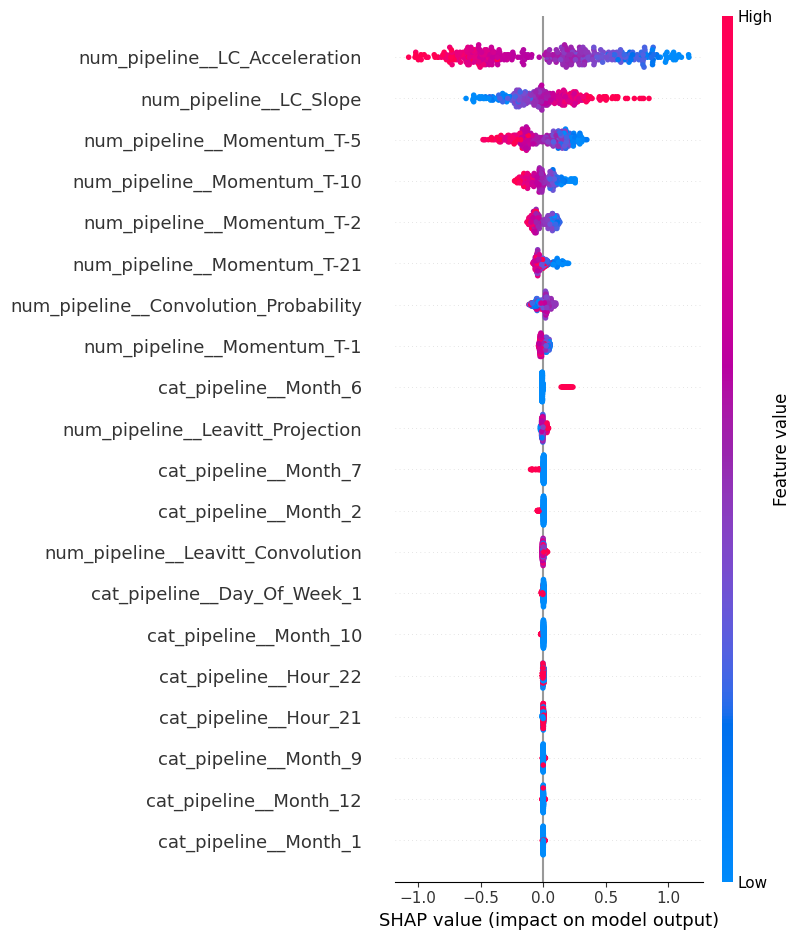

In [276]:
shap.summary_plot(shap_values, X_test_scaled_df)

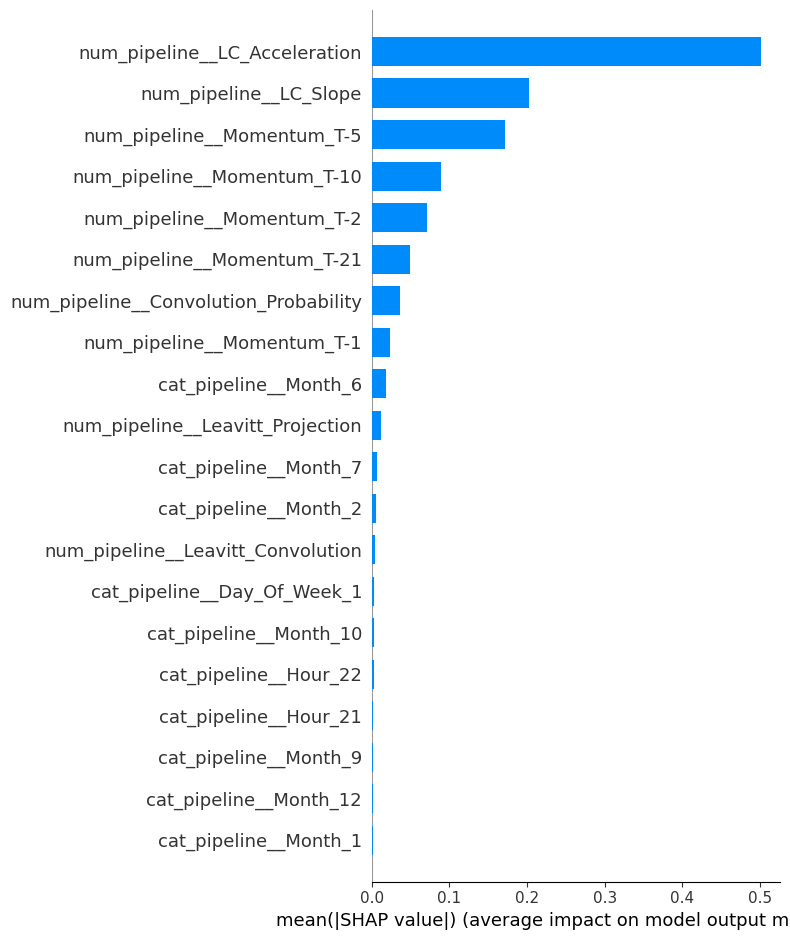

In [277]:
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

In [278]:
print(X_test.shape, X_test_scaled_df.shape, shap_values.shape)

(364, 27) (364, 35) (364, 35)


In [279]:
print("cat_pipeline__Month_6" in X_test_scaled_df.columns)


True


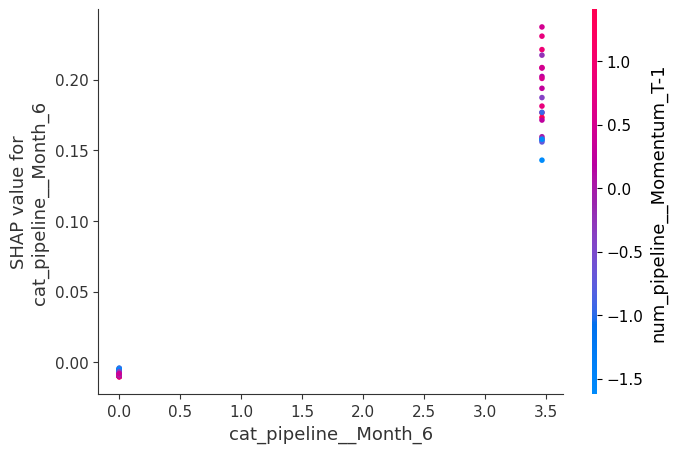

In [280]:
# Extract SHAP values for dependence plot
shap_values_array = shap_values.values
shap.dependence_plot(
    "cat_pipeline__Month_6", shap_values_array, X_test_scaled_df
)